In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [11]:
base_dir = os.path.abspath('../')
file_path = os.path.join(base_dir, 'data', 'raw', 'data.csv')
data = pd.read_csv(file_path)

## 1 Dataset Overview

In [16]:
print("Dataset Overview")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nColumn Data Types:")
print(data.dtypes)
print("\nFirst 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

Dataset Overview
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  Subscr

# 2. Summary Statistics

In [17]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


# 3. Distribution of Numerical Features


Numerical Columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


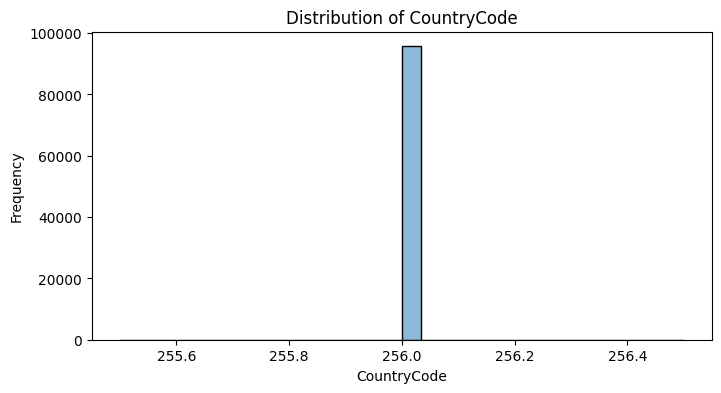

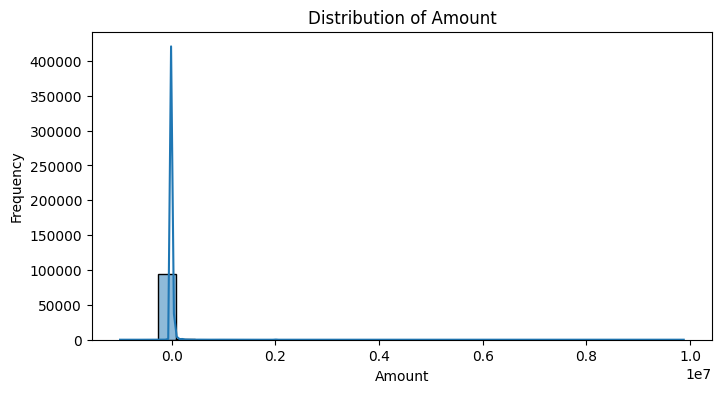

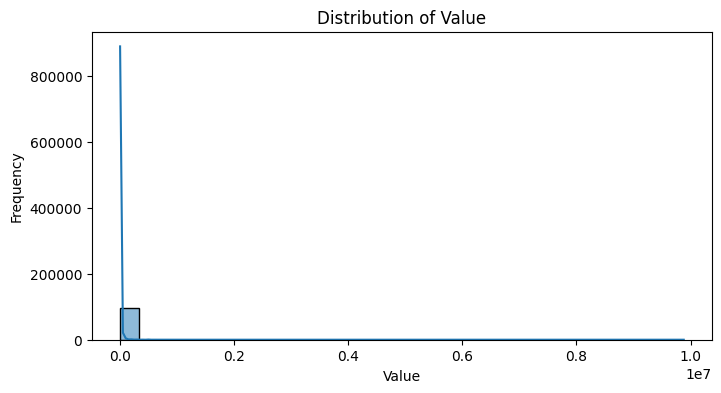

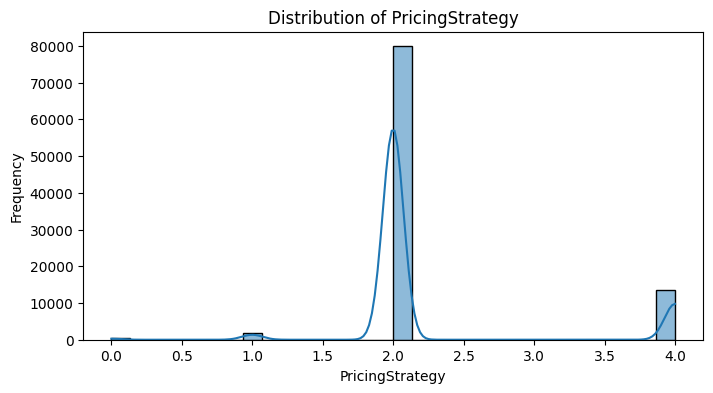

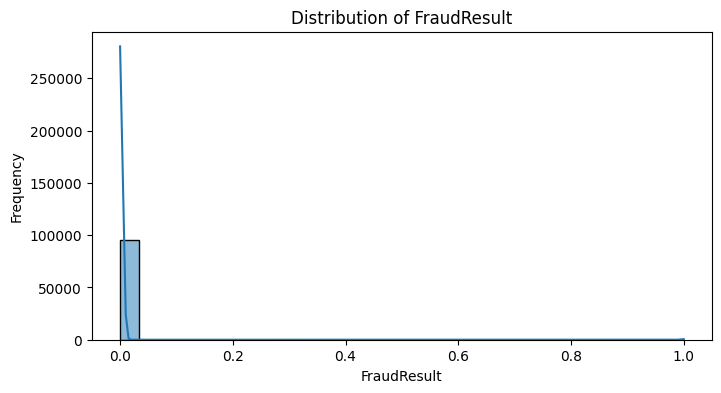

In [20]:
# 3. Distribution of Numerical Features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:", numerical_cols.tolist())
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 4. Distribution of Categorical Features

In [21]:
# 4. Distribution of Categorical Features
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", categorical_cols.tolist())
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Categorical Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


KeyboardInterrupt: 

In [ ]:
# 5. Correlation Analysis
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 6. Identifying Missing Values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("\nMissing Values:")
print(missing_df[missing_df['Missing Values'] > 0])

In [ ]:
# 7. Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col)
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()
